In [25]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
attributesInput = pd.read_csv('../Dataset/AttributesF.csv')
emailDataInput = pd.read_csv('../Dataset/FinalEdata.csv')
conflictsInput = pd.read_csv('../Dataset/TC2.csv')

C:\Users\곰단\AppData\Local\Temp\ipykernel_3828\2029714194.py:7: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  emailDataInput = pd.read_csv('../Dataset/FinalEdata.csv')


In [26]:
Interdependency = conflictsInput.set_index(['Source'])
Interdependency = Interdependency.stack().to_frame()
Interdependency = Interdependency.rename_axis(['sjt', 'ojt']).reset_index()
Interdependency = Interdependency.rename(columns={0: 'type'}) 
Interdependency = Interdependency.astype({'type': 'int32'})
Interdependency = Interdependency.astype({'ojt': 'int32'})

In [27]:
Interdependency['num_email'] = 0
Interdependency['workaround'] = 0

In [28]:
for i, row in Interdependency.iterrows():
    number_of_emails = len(emailDataInput.loc[(emailDataInput['Sender'] == row['sjt']) & (emailDataInput['Recipient'] == row['ojt'])].index)
    if number_of_emails > 0:
        Interdependency.at[i, 'num_email'] = number_of_emails

In [29]:
print("Interdependency with at least 1 Email between them:", len(Interdependency.loc[Interdependency['num_email']>0].index))
print("Interdependency:", len(Interdependency.index))

Interdependency with at least 1 Email between them: 1717
Interdependency: 3586


In [30]:
conflicts = Interdependency.loc[Interdependency['type'] == 1]
for i, row in conflicts.iterrows():
    sjt_Interdependency = Interdependency.loc[(Interdependency['sjt'] == row['sjt']) | (Interdependency['ojt'] == row['sjt'])]
    sjt_Interdependency = sjt_Interdependency.loc[sjt_Interdependency['type'] != 1]
    ojt_Interdependency = Interdependency.loc[(Interdependency['sjt'] == row['ojt']) | (Interdependency['ojt'] == row['ojt'])]
    ojt_Interdependency = ojt_Interdependency.loc[ojt_Interdependency['type'] != 1]
    common_sjt = sjt_Interdependency.loc[(sjt_Interdependency['sjt'].isin(ojt_Interdependency['sjt'])) | (sjt_Interdependency['ojt'].isin(ojt_Interdependency['sjt'])) | (sjt_Interdependency['sjt'].isin(ojt_Interdependency['ojt'])) | (sjt_Interdependency['ojt'].isin(ojt_Interdependency['ojt']))]
    common_ojt = ojt_Interdependency.loc[(ojt_Interdependency['sjt'].isin(sjt_Interdependency['sjt'])) | (ojt_Interdependency['ojt'].isin(sjt_Interdependency['sjt'])) | (ojt_Interdependency['sjt'].isin(sjt_Interdependency['ojt'])) | (ojt_Interdependency['ojt'].isin(sjt_Interdependency['ojt']))]
    for j, sjt_row in common_sjt.iterrows():
        Interdependency.at[j, 'workaround'] = 1
    for j, ojt_row in common_ojt.iterrows():
        Interdependency.at[j, 'workaround'] = 1

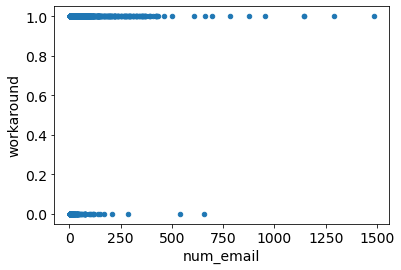

In [31]:
Interdependency = Interdependency.loc[Interdependency['num_email'] > 0]
ax = Interdependency.plot.scatter(x='num_email', y='workaround')
plt.show()

In [32]:
plt.rc("font", size=14)

In [33]:
X = Interdependency['num_email']
y = Interdependency['workaround']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.534423
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.461   
Dependent Variable: workaround       AIC:              1837.2070
Date:               2022-08-01 17:00 BIC:              1842.6554
No. Observations:   1717             Log-Likelihood:   -917.60  
Df Model:           0                LL-Null:          -627.94  
Df Residuals:       1716             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
num_email   0.0384     0.0027   14.0451   0.0000   0.0331   0.0438



In [34]:
Interdependency['conflict_present'] = np.where(Interdependency['type'] == 1, 1, 0)


In [35]:
X = Interdependency['num_email']
y = Interdependency['conflict_present']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.498418
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.544   
Dependent Variable: conflict_present AIC:              1713.5667
Date:               2022-08-01 17:00 BIC:              1719.0150
No. Observations:   1717             Log-Likelihood:   -855.78  
Df Model:           0                LL-Null:          -554.42  
Df Residuals:       1716             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
num_email   -0.0518    0.0035  -14.7117  0.0000  -0.0587  -0.0449

